In [1]:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [3]:
# Define the number of records in your dataset
num_records = 100
# Create a dictionary to store the data
data = {
 'House_ID': range(1, num_records + 1),
 'Square_Feet': np.random.randint(1000, 4000, size=num_records),
 'Num_Bedrooms': np.random.randint(2, 6, size=num_records),
 'Num_Bathrooms': np.random.randint(1, 4, size=num_records),
 'Year_Built': np.random.randint(1970, 2023, size=num_records),
 'Price': np.random.randint(100000, 800000, size=num_records),
 'City': [random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']) for _ in range(num_records)],
 'Garage': [random.choice([True, False]) for _ in range(num_records)]
}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
# Save the DataFrame as a CSV file
df.to_csv('house_sales.csv', index=False)
print("Dummy dataset 'house_sales.csv' created successfully.")

Dummy dataset 'house_sales.csv' created successfully.


In [7]:

# Load the dataset
data = pd.read_csv("house_sales.csv")

In [9]:
data.head()


,House_ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Year_Built,Price,City,Garage
0,1,1735,2,2,2013,114241,Houston,True
1,2,2320,4,1,2014,329204,Phoenix,True
2,3,3682,5,2,2014,482686,New York,True
3,4,1834,5,2,1971,186154,Phoenix,False
4,5,1307,3,3,2007,338461,Los Angeles,True


In [11]:
data.describe()

,House_ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Year_Built,Price
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,2366.040000,3.72000,1.820000,1995.970000,430895.090000
std,29.011492,873.972215,1.07384,0.757188,16.016693,182215.052261
min,1.000000,1026.000000,2.00000,1.000000,1970.000000,100148.000000
25%,25.750000,1620.000000,3.00000,1.000000,1981.750000,312489.500000
50%,50.500000,2323.000000,4.00000,2.000000,1995.500000,437591.000000
75%,75.250000,3051.000000,5.00000,2.000000,2011.000000,556812.250000
max,100.000000,3952.000000,5.00000,3.000000,2022.000000,785740.000000


In [13]:
data.isnull().sum()

House_ID         0
Square_Feet      0
Num_Bedrooms     0
Num_Bathrooms    0
Year_Built       0
Price            0
City             0
Garage           0
dtype: int64

In [15]:
data.dtypes


House_ID          int64
Square_Feet       int64
Num_Bedrooms      int64
Num_Bathrooms     int64
Year_Built        int64
Price             int64
City             object
Garage             bool
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   House_ID       100 non-null    int64 
 1   Square_Feet    100 non-null    int64 
 2   Num_Bedrooms   100 non-null    int64 
 3   Num_Bathrooms  100 non-null    int64 
 4   Year_Built     100 non-null    int64 
 5   Price          100 non-null    int64 
 6   City           100 non-null    object
 7   Garage         100 non-null    bool  
dtypes: bool(1), int64(6), object(1)
memory usage: 5.7+ KB


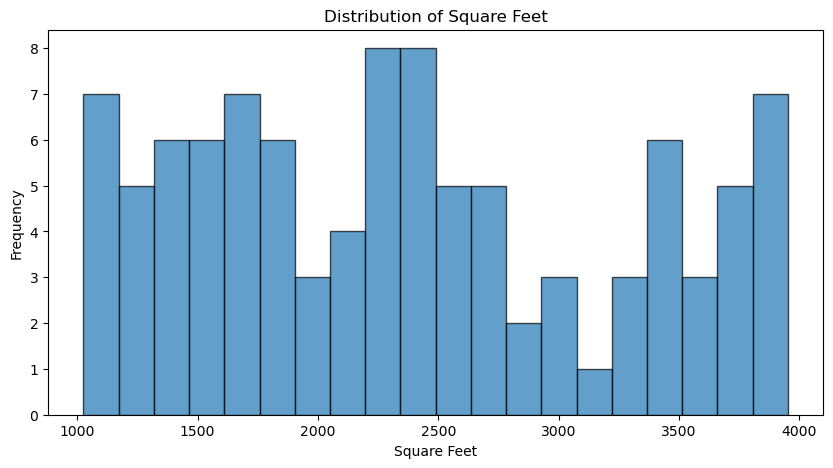

In [19]:

# Plot 1: Histogram of Square Feet
plt.figure(figsize=(10, 5))
plt.hist(data['Square_Feet'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.show()